In [ ]:
#Connecting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing Required Libries
import os
import zipfile
import tensorflow as tf
import numpy as np
import cv2
import keras
import matplotlib.pyplot as plt
from keras. preprocessing.image import ImageDataGenerator
from keras.models import load_model,save_model
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.applications import DenseNet121
from keras.optimizers import Adam
from keras.applications.densenet import preprocess_input


In [1]:
#Adding credential of kaggle
os.environ['KAGGLE_USERNAME'] = "dhanushsuvarna" # username from the json file
os.environ['KAGGLE_KEY'] = "264136212b081bbb4ae039b39493efd9" # key from the json file

In [ ]:
#downloading dataset from kaggle
!kaggle datasets download -d ahemateja19bec1025/traffic-sign-dataset-classification

In [ ]:
#unziping the dataset and storing in drive
zip_ref = zipfile.ZipFile("/content/traffic-sign-dataset-classification.zip", 'r')
zip_ref.extractall("/content/drive/MyDrive/traffic data")
zip_ref.close()


In [ ]:
#installing spilt folders
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#splitting the folders into train and test (70%,30%)
import splitfolders
input_folder = "/content/drive/MyDrive/traffic data/traffic_Data/DATA"
output = "/content/drive/MyDrive/traffic data"
splitfolders.ratio(input_folder, output=output, seed=42, ratio=(.7,.3))



Copying files: 4170 files [00:35, 116.95 files/s]


In [ ]:
#Path of train test and pre
train_data_dir = '/content/drive/MyDrive/traffic sign data/train'
test_data_dir =  '/content/drive/MyDrive/traffic sign data/val'

In [ ]:
#Image data genrator for augmentation
IMG_SIZE = (224, 224)
BATCH_SIZE = 100
image_generator = ImageDataGenerator(rescale=1./255,rotation_range = 10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='constant',
    shear_range=0.1,
    zoom_range=0.2,
   validation_split=0.2)    
# set the directory for train test and validation
train_data = image_generator.flow_from_directory( directory=train_data_dir,
                                                 target_size=IMG_SIZE, 
                                                 subset="training",
                                                 class_mode='categorical',batch_size=BATCH_SIZE)

val_data = image_generator.flow_from_directory(directory=train_data_dir,
                                                 target_size=IMG_SIZE, 
                                                 subset="validation",
                                                 class_mode='categorical',batch_size=BATCH_SIZE)
test_gen = ImageDataGenerator(rescale=1./255)
test_data = test_gen.flow_from_directory(test_data_dir,
                                       target_size=IMG_SIZE, batch_size=BATCH_SIZE,shuffle=False)


Found 2340 images belonging to 58 classes.
Found 556 images belonging to 58 classes.
Found 1274 images belonging to 58 classes.


In [ ]:
#model Creation using densnet
model = Sequential()

pretrained_model= DenseNet121(include_top=False,
                   input_shape=(224,224,3),
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False
model.add(pretrained_model)


In [ ]:
#Adding flatten layer and output layer
model.add(Flatten())
model.add(Dense(58, activation='softmax'))

In [ ]:
#model Summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 flatten_1 (Flatten)         (None, 50176)             0         
                                                                 
 dense_1 (Dense)             (None, 58)                2910266   
                                                                 
Total params: 9,947,770
Trainable params: 2,910,266
Non-trainable params: 7,037,504
_________________________________________________________________


In [ ]:
#compiling the model 
model.compile(optimizer=Adam(learning_rate=0.0005), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


In [ ]:
#Adding filepath and saving the weights for every epochs 
checkpoint_filepath='/content/drive/MyDrive/traffic sign dataset'
call_back=[ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True),EarlyStopping(monitor="val_accuracy",patience=6)]


In [ ]:
#Training the model 
model.fit_generator(train_data,validation_data= val_data,epochs=100,callbacks=call_back)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/100
24/24 [==============================] - 52s 2s/step - loss: 3.9755 - accuracy: 0.4846 - val_loss: 1.1738 - val_accuracy: 0.7878
Epoch 2/100
24/24 [==============================] - 37s 2s/step - loss: 0.7142 - accuracy: 0.8667 - val_loss: 0.6193 - val_accuracy: 0.8435
Epoch 3/100
24/24 [==============================] - 36s 2s/step - loss: 0.3513 - accuracy: 0.9051 - val_loss: 0.2973 - val_accuracy: 0.9101
Epoch 4/100
24/24 [==============================] - 37s 2s/step - loss: 0.2375 - accuracy: 0.9333 - val_loss: 0.2838 - val_accuracy: 0.9299
Epoch 5/100
24/24 [==============================] - 36s 2s/step - loss: 0.2201 - accuracy: 0.9530 - val_loss: 0.2799 - val_accuracy: 0.9424
Epoch 6/100
24/24 [==============================] - 36s 2s/step - loss: 0.1276 - accuracy: 0.9615 - val_loss: 0.2686 - val_accuracy: 0.9550
Epoch 7/100
24/24 [==============================] - 36s 2s/step - loss: 0.1451 - accuracy: 0.9654 - val_loss: 0.2334 - val_accuracy: 0.9353
Epoch 8/100
2

In [ ]:
#Evaluating test data
model.evaluate_generator(test_data)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.16805364191532135, 0.9772370457649231]

In [ ]:
#saving the model
model.save('/content/drive/MyDrive/traffic sign dataset/densenet-best-model3.hdf5')


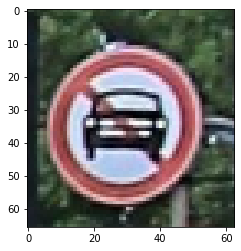

In [ ]:
#Plotting the inferance data 
inf_img = plt.imread('/content/drive/MyDrive/traffic data/traffic_Data/TEST/016_0016_j.png')
plt.imshow(inf_img)
plt.show()

In [ ]:
#Resizing the inferance data
infer_img_resize = cv2.resize(inf_img,(224,224))

In [ ]:
# converting  array to image
x = keras.utils.array_to_img(infer_img_resize)
# it expands the dimention of array like if we have 1D array and we applied expand_dims that convert into 2D array
x = np.expand_dims(x,axis=0)

In [ ]:
# preprocess our image
x = preprocess_input(x)


In [ ]:
# prediction 
final = model.predict(x)

1/1 [==============================] - 3s 3s/step


In [ ]:
# argmax return the maximum element of the array
intel = ['0','1','10','11','12','13','14','15','16','17','18','19','2','20','21','22','23','24','25','26','27','28','29','3','30','31','32','33','34','35','36','37','38','39','4','40','41','42','43','44','45','46','47','48','49','5','50','51','52','53','54','55','56','57','6','7','8','9']
predicted = intel[np.argmax(model.predict(x)[0])]

1/1 [==============================] - 0s 36ms/step


In [ ]:
predicted

'16'

In [ ]:
#Loading the saved model
new_model=load_model('/content/drive/MyDrive/Traffic Sign Dataset/densenet-best-model3.hdf5')

In [ ]:
#Evaluating Test data
new_model.evaluate_generator(test_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.16805364191532135, 0.9772370457649231]

In [ ]:
#adding inferance data
infer_data_dir ="/content/drive/MyDrive/traffic sign data/TEST"
infer_gen = ImageDataGenerator(rescale=1./255)
infer_data = infer_gen.flow_from_directory(infer_data_dir,
                                       target_size=IMG_SIZE, batch_size=BATCH_SIZE,shuffle=False)


Found 1998 images belonging to 58 classes.


In [ ]:
#Evalutating Inferance data
new_model.evaluate_generator(infer_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[3.248878002166748, 0.6336336135864258]